In [31]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob

In [32]:
TRAIN_DAY = "day_night_images/training/day"
TRAIN_NIGHT = "day_night_images/training/night"
path_day_images = glob.glob(TRAIN_DAY + "/*.jpg")
path_night_images = glob.glob(TRAIN_NIGHT + "/*.jpg")

In [33]:
day_images = [cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB) for image in path_day_images]
night_images = [cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB) for image in path_night_images]

In [34]:
print("Day Traning images: ", len(day_images), " of shape: ", day_images[0].shape)
print("Night Traning images: ", len(night_images), " of shape: ", night_images[0].shape)

Day Traning images:  120  of shape:  (372, 640, 3)
Night Traning images:  120  of shape:  (555, 800, 3)


In [35]:
# Converting images to hsv
day_hsvs = [cv2.cvtColor(image, cv2.COLOR_RGB2HSV) for image in day_images]
night_hsvs = [cv2.cvtColor(image, cv2.COLOR_RGB2HSV) for image in night_images]

Day | Night Images


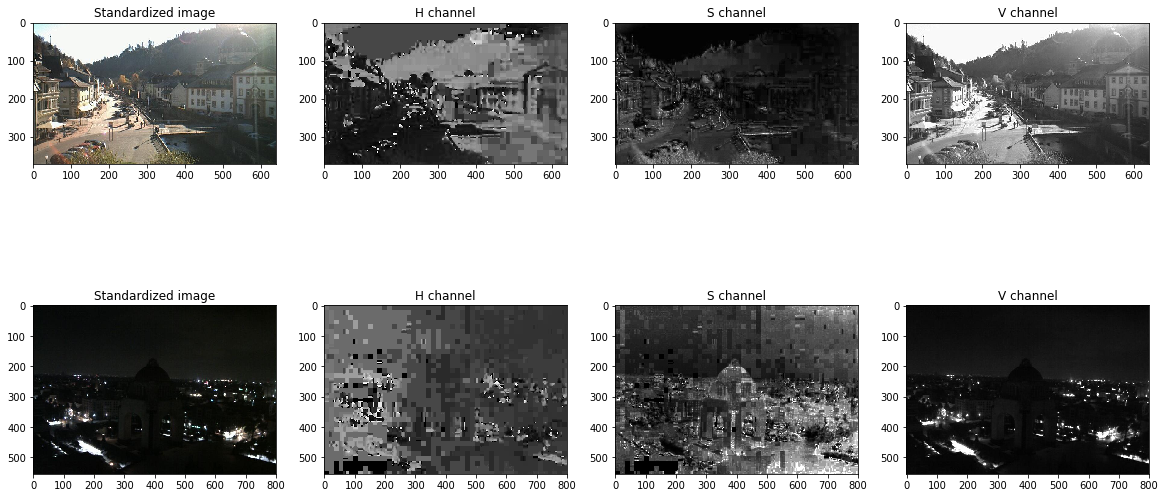

In [36]:
fx, plots = plt.subplots(2, 4, figsize=(20, 10))

print("Day | Night Images")
plots[0][0].set_title("Standardized image")
plots[0][0].imshow(day_images[0])

plots[0][1].set_title("H channel")
plots[0][1].imshow(day_hsvs[0][:, :, 0], cmap='gray')

plots[0][2].set_title("S channel")
plots[0][2].imshow(day_hsvs[0][:, :, 1], cmap='gray')

plots[0][3].set_title("V channel")
plots[0][3].imshow(day_hsvs[0][:, :, 2], cmap='gray')

plots[1][0].set_title("Standardized image")
plots[1][0].imshow(night_images[0])

plots[1][1].set_title("H channel")
plots[1][1].imshow(night_hsvs[0][:, :, 0], cmap='gray')

plots[1][2].set_title("S channel")
plots[1][2].imshow(night_hsvs[0][:, :, 1], cmap='gray')

plots[1][3].set_title("V channel")
plots[1][3].imshow(night_hsvs[0][:, :, 2], cmap='gray')


In [37]:
X_train = []
Y_train = []
labels = []

In [38]:
def image_avg(image):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    total_v = np.sum(img_hsv[:,:, 2])
    avg = total_v / (image.shape[0] * image.shape[1])
    
    return avg

In [39]:
for image in day_hsvs:
    X_train.append(image_avg(image))
    Y_train.append(1)
    labels.append('day')
for image in night_hsvs:
    X_train.append(image_avg(image))
    Y_train.append(0)
    labels.append('night')

Traning data:  240
Traning average:  240


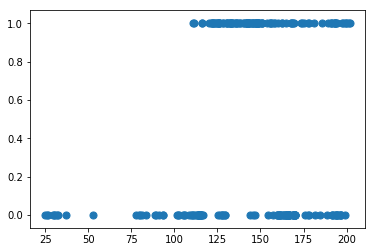

In [53]:
X_train = np.reshape(X_train, (-1, 1))
print("Traning data: ", len(X_train))
print("Traning average: ", len(Y_train))
plt.scatter(X_train,Y_train,  s=50, cmap='autumn')
plt.show()

In [51]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, Y_train)))

Accuracy of SVM classifier on training set: 0.90


/home/deepanshu/.conda/envs/smartcar/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [63]:
TEST_DAY = "day_night_images/test/day"
TEST_NIGHT = "day_night_images/test/night"
path_day_test = glob.glob(TEST_DAY + "/*.jpg")
path_night_test = glob.glob(TEST_NIGHT + "/*.jpg")

In [64]:
day_test = [cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB) for image in path_day_test]
night_test = [cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB) for image in path_night_test]
print("Day Test images: ", len(day_test), " of shape: ", day_test[0].shape)
print("Night Test images: ", len(night_test), " of shape: ", night_test[0].shape)

Day Test images:  80  of shape:  (471, 640, 3)
Night Test images:  80  of shape:  (889, 1280, 3)


In [65]:
# Converting images to hsv
day_hsvs_test = [cv2.cvtColor(image, cv2.COLOR_RGB2HSV) for image in day_test]
night_hsvs_test = [cv2.cvtColor(image, cv2.COLOR_RGB2HSV) for image in night_test]

In [66]:
X_test = []
Y_test = []
labels_test = []
for image in day_hsvs_test:
    X_test.append(image_avg(image))
    Y_test.append(1)
    labels_test.append('day')
for image in night_hsvs_test:
    X_test.append(image_avg(image))
    Y_test.append(0)
    labels_test.append('night')

In [67]:
X_test = np.reshape(X_test, (-1, 1))

In [68]:
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, Y_test)))

Accuracy of SVM classifier on test set: 0.63
